In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display, HTML
import random
from PIL import Image

/home/pmedur/Lumen/bin/Lumen_ML_project
/home/pmedur/Lumen/bin/Lumen_ML_project/data/ISIC_2020_Train_Metadata_with_skin_type.csv


,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,skin_type
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0,III
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0,III
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0,III
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0,V
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0,III


,age_approx,target
count,1906.000000,1908.000000
mean,43.121721,0.009958
std,14.285719,0.099318
min,10.000000,0.000000
25%,30.000000,0.000000
50%,40.000000,0.000000
75%,50.000000,0.000000
max,90.000000,1.000000


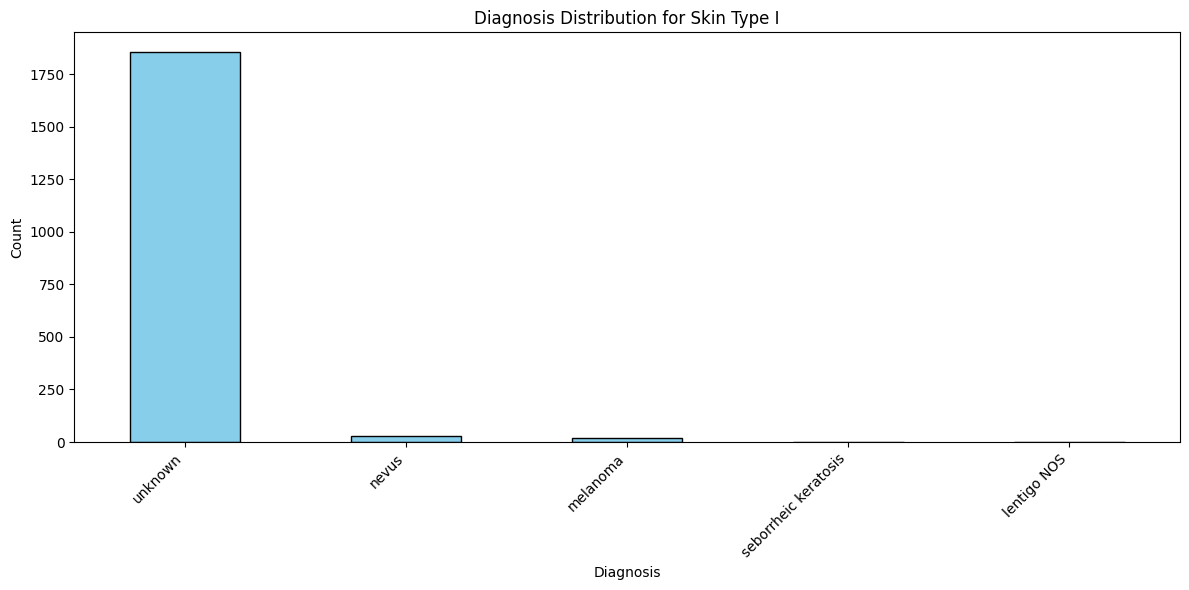

Data for skin type I saved to /home/pmedur/Lumen/bin/Lumen_ML_project/data/skin_type_analysis/skin_type_I_data.csv


,age_approx,target
count,7239.000000,7255.000000
mean,47.460975,0.005651
std,14.071045,0.074967
min,10.000000,0.000000
25%,35.000000,0.000000
50%,45.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


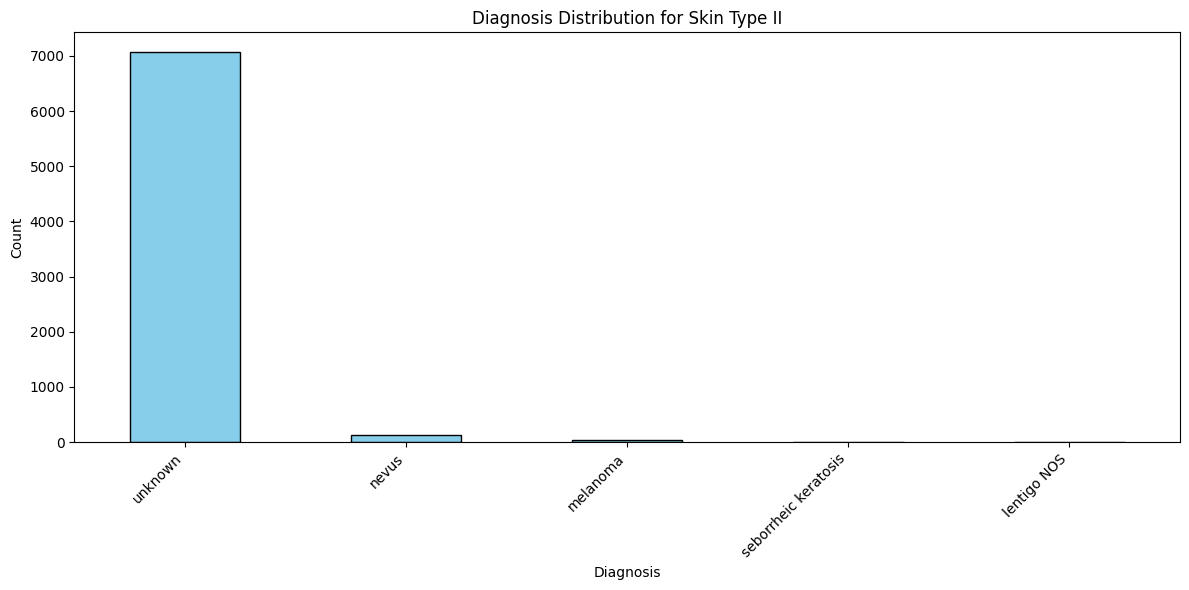

Data for skin type II saved to /home/pmedur/Lumen/bin/Lumen_ML_project/data/skin_type_analysis/skin_type_II_data.csv


,age_approx,target
count,15018.000000,15059.000000
mean,49.253229,0.016402
std,14.259017,0.127020
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


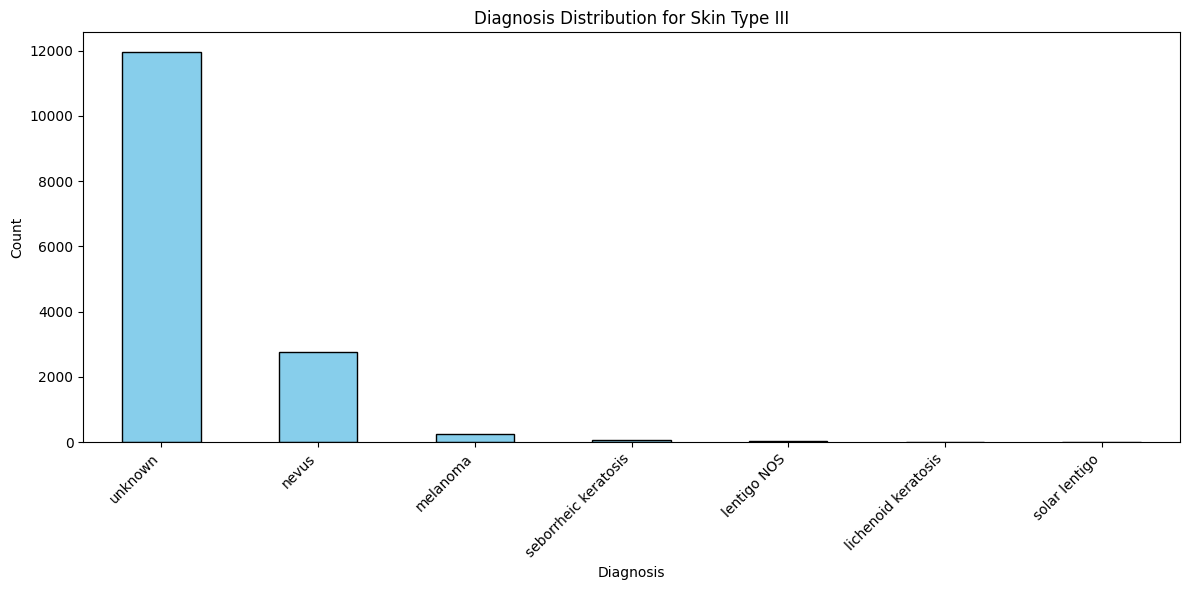

Data for skin type III saved to /home/pmedur/Lumen/bin/Lumen_ML_project/data/skin_type_analysis/skin_type_III_data.csv


,age_approx,target
count,6742.000000,6744.000000
mean,50.767576,0.029804
std,14.116427,0.170060
min,10.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


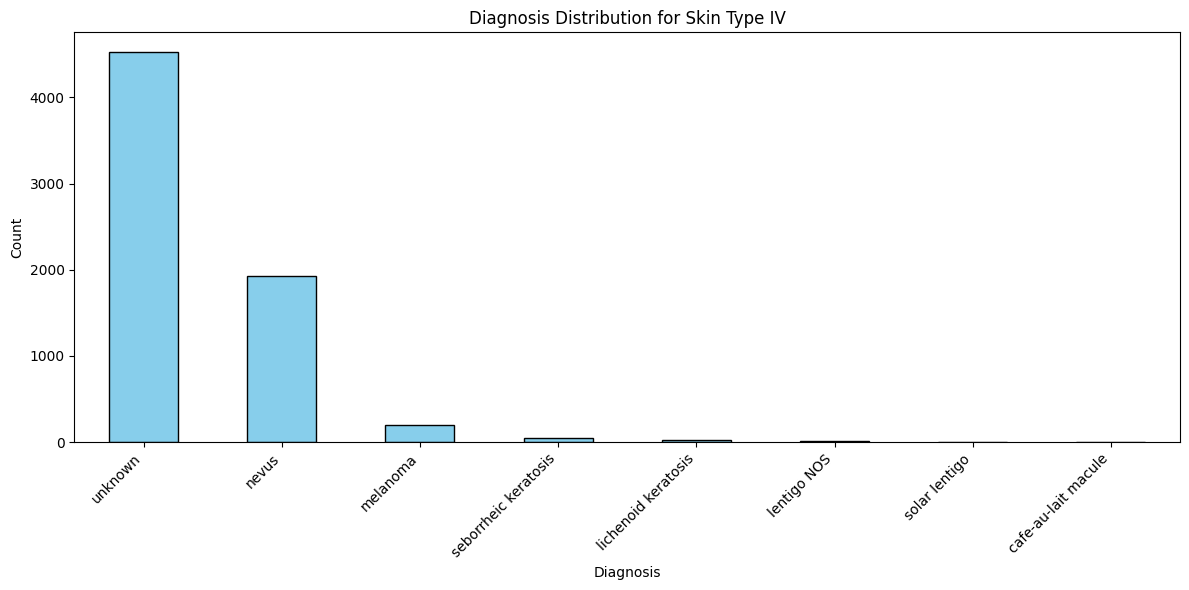

Data for skin type IV saved to /home/pmedur/Lumen/bin/Lumen_ML_project/data/skin_type_analysis/skin_type_IV_data.csv


,age_approx,target
count,1652.000000,1655.000000
mean,50.723366,0.033837
std,14.911623,0.180864
min,0.000000,0.000000
25%,40.000000,0.000000
50%,50.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


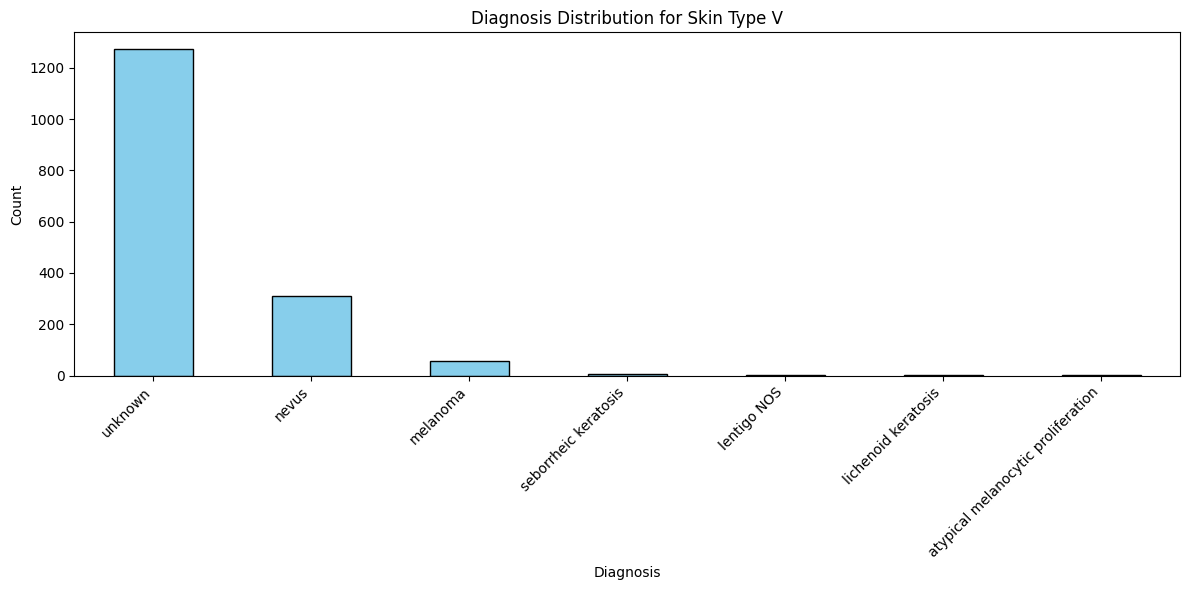

Data for skin type V saved to /home/pmedur/Lumen/bin/Lumen_ML_project/data/skin_type_analysis/skin_type_V_data.csv


,age_approx,target
count,501.000000,505.000000
mean,47.964072,0.039604
std,16.767430,0.195220
min,10.000000,0.000000
25%,35.000000,0.000000
50%,45.000000,0.000000
75%,60.000000,0.000000
max,90.000000,1.000000


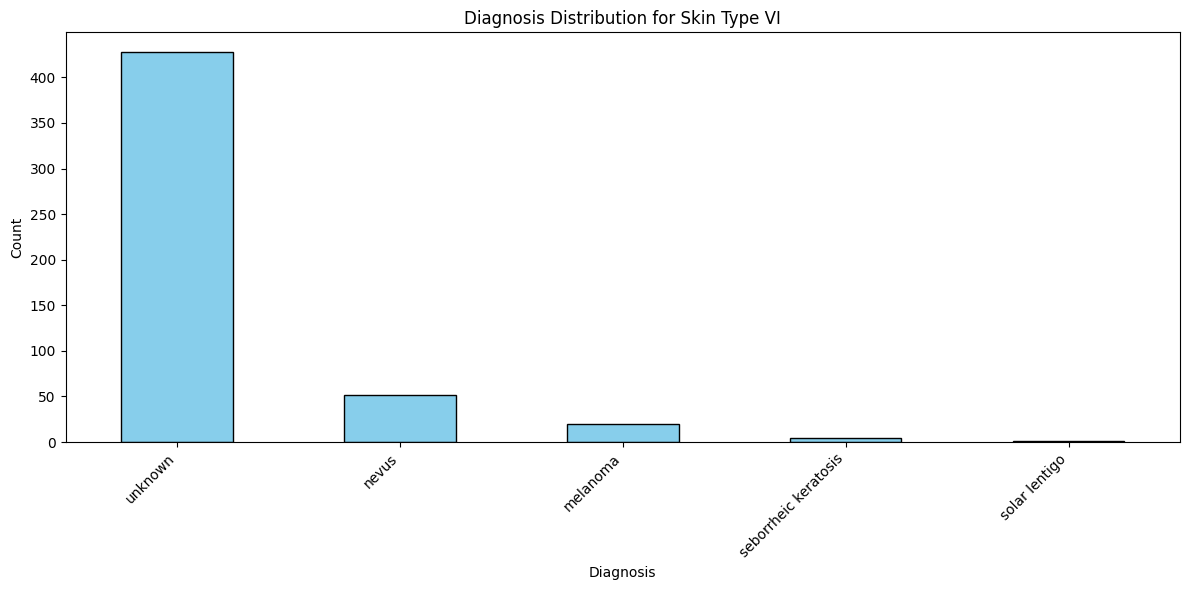

Data for skin type VI saved to /home/pmedur/Lumen/bin/Lumen_ML_project/data/skin_type_analysis/skin_type_VI_data.csv


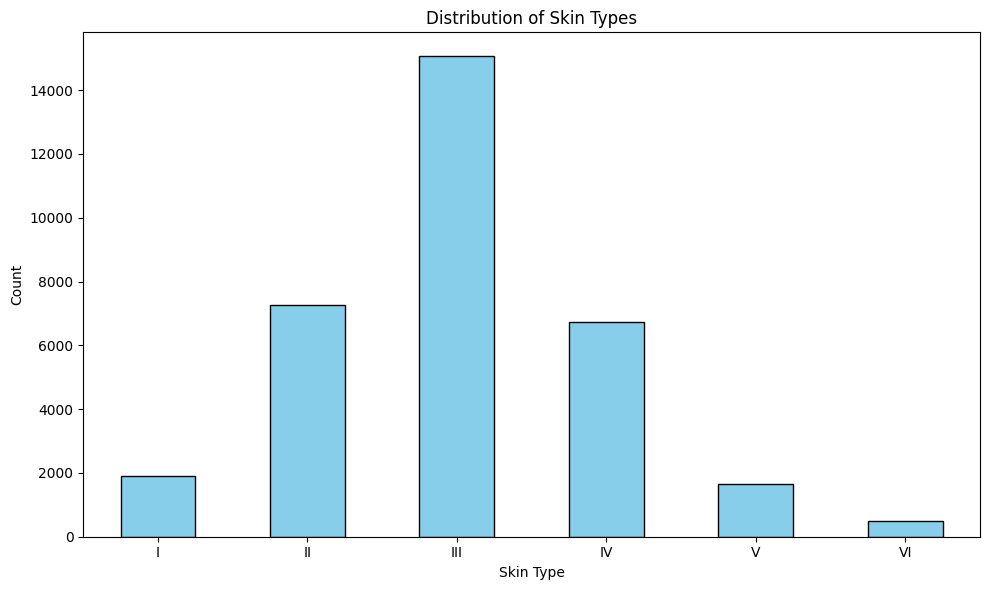

Analysis complete. Check the 'skin_type_analysis' folder for saved CSV files.


In [ ]:
# Get the current working directory (ETL_and_EDA/helping_notebooks)
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

# Navigate up two levels to reach the project root, then into the data folder
csv_path = os.path.join(project_dir, 'data', 'ISIC_2020_Train_Metadata_with_skin_type.csv')
df = pd.read_csv(csv_path)

# Display the first few rows of the dataframe
display(HTML("<h3>First few rows of the dataset:</h3>"))
display(df.head())

# Group data by skin type
grouped = df.groupby('skin_type')

# Create a directory for output if it doesn't exist
output_dir = os.path.join(project_dir, 'data', 'skin_type_analysis')
os.makedirs(output_dir, exist_ok=True)

# Process each skin type
for skin_type, group in grouped:
    display(HTML(f"<h2>Analysis for Skin Type {skin_type}</h2>"))
    
    # Display summary statistics
    display(HTML("<h3>Summary Statistics:</h3>"))
    display(group.describe())
    
    # Create a bar chart for the count of diagnoses within this skin type
    plt.figure(figsize=(12, 6))
    diagnosis_counts = group['diagnosis'].value_counts()
    diagnosis_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Diagnosis Distribution for Skin Type {skin_type}')
    plt.xlabel('Diagnosis')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Save data for this skin type to a CSV file
    output_path = f'{output_dir}/skin_type_{skin_type}_data.csv'
    group.to_csv(output_path, index=False)
    print(f"Data for skin type {skin_type} saved to {output_path}")

# Create an overall skin type distribution graph
display(HTML("<h2>Overall Skin Type Distribution</h2>"))
skin_type_counts = grouped.size()
plt.figure(figsize=(10, 6))
skin_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Skin Types')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Analysis complete. Check the 'skin_type_analysis' folder for saved CSV files.")


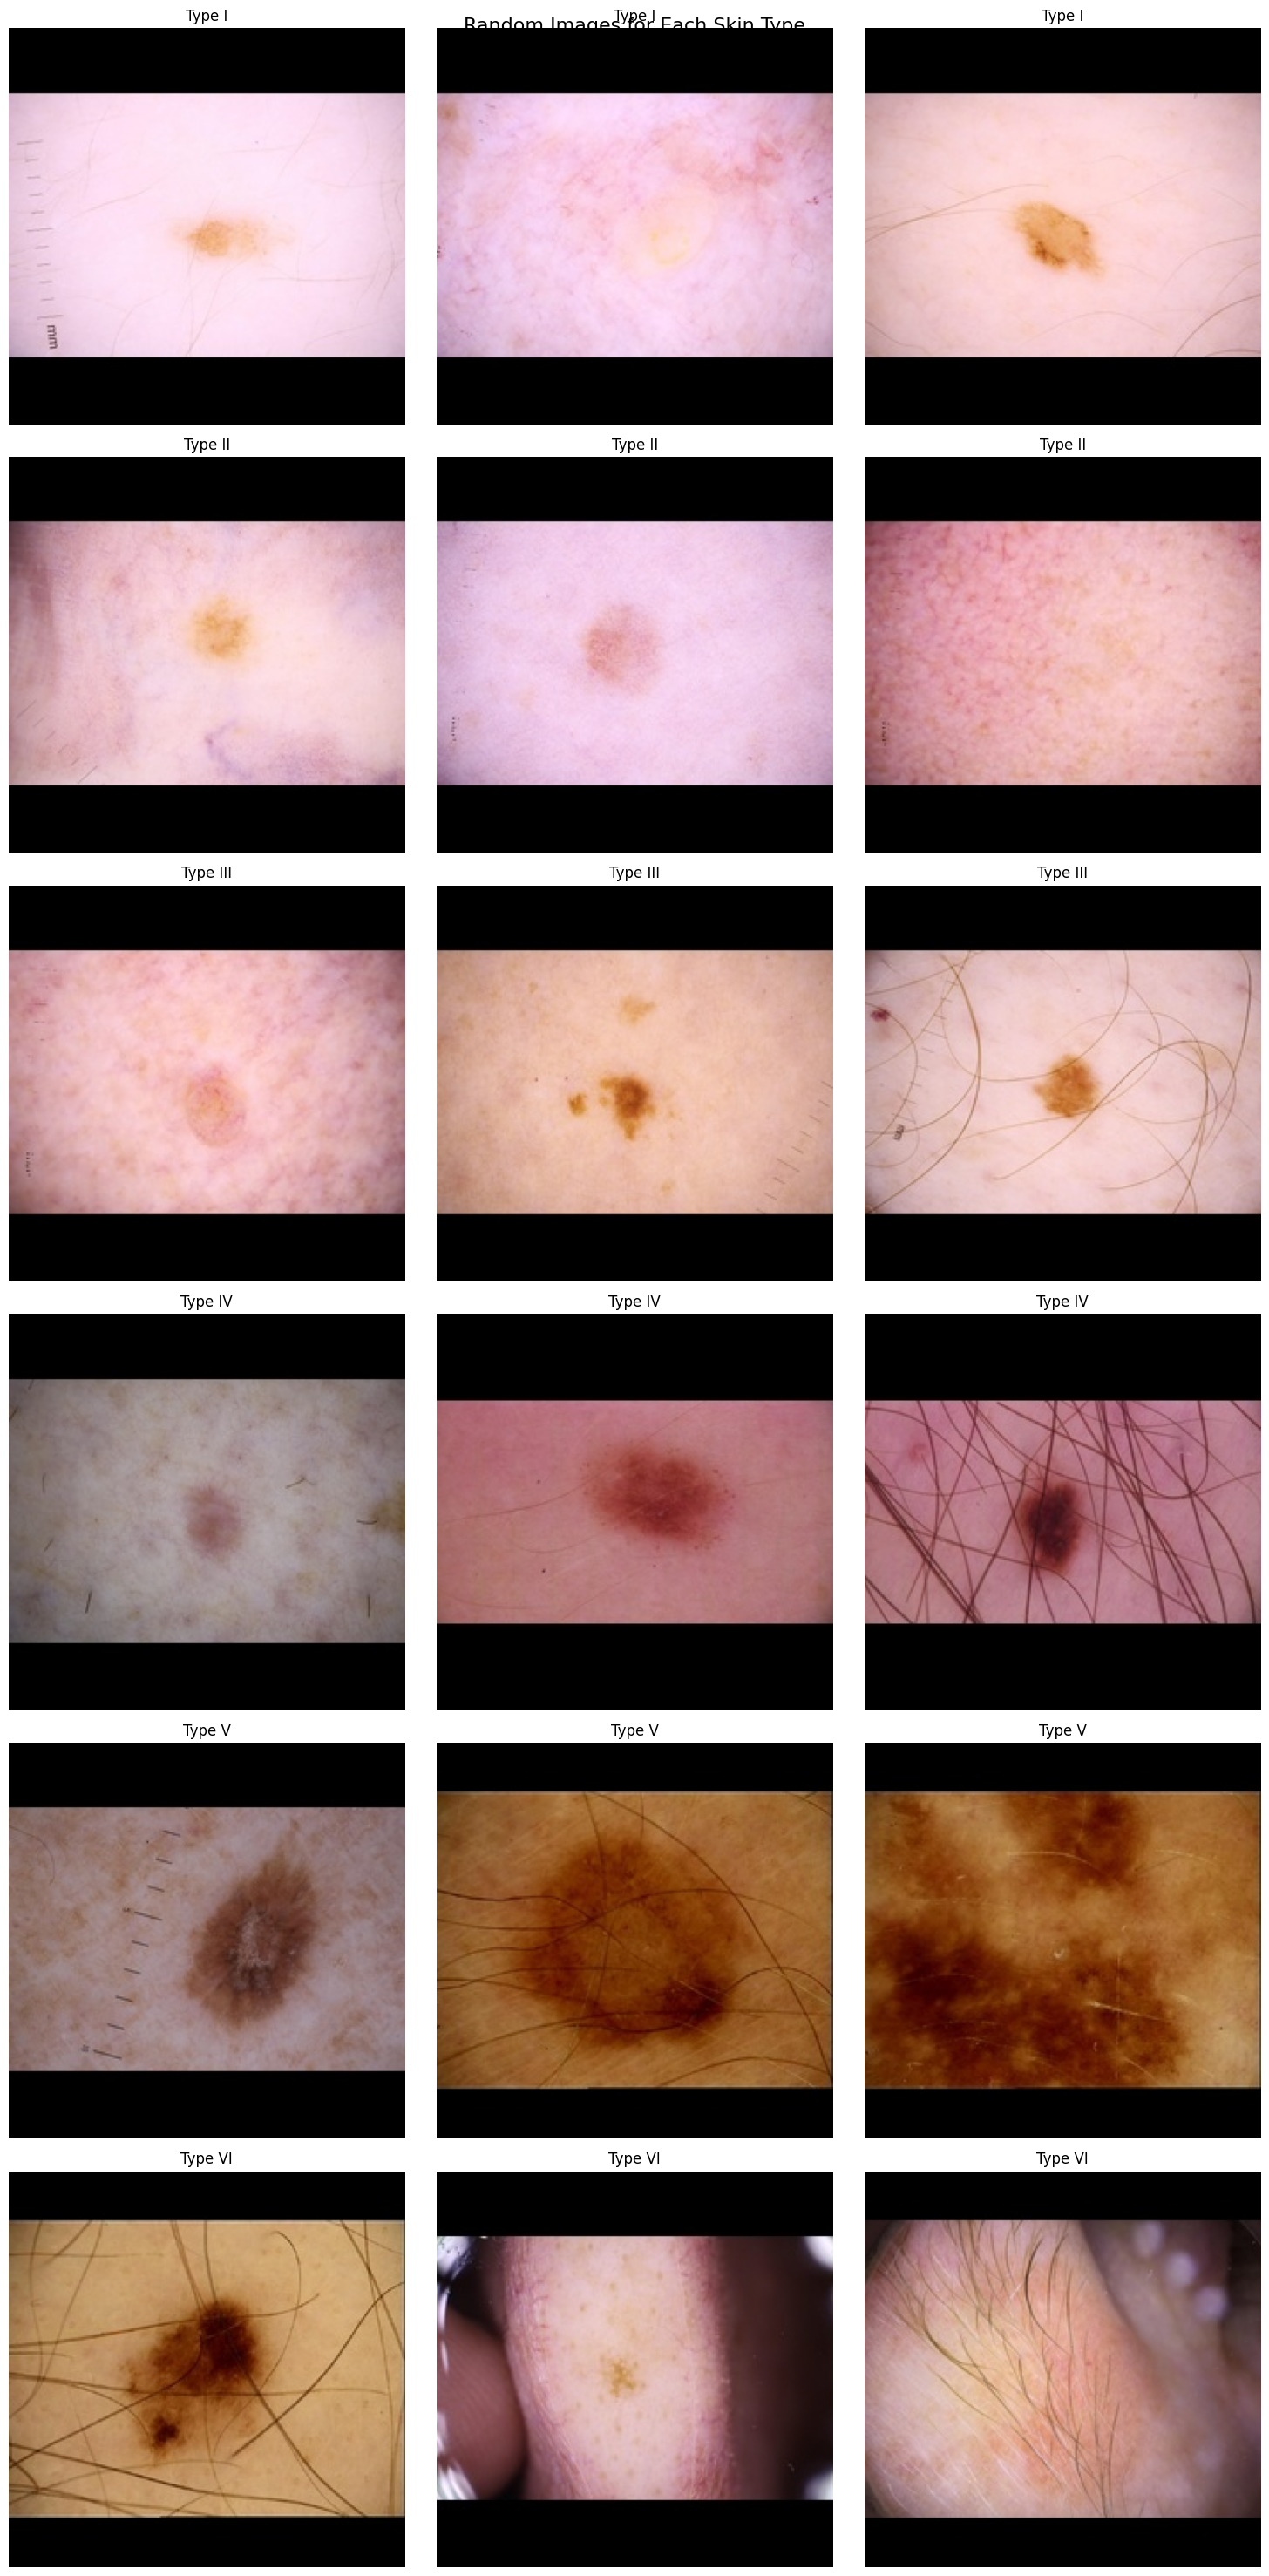

In [ ]:
def display_random_images(df, image_folder, num_images=3):
    # Group the dataframe by skin type
    grouped = df.groupby('skin_type')
    
    # Create a figure with subplots for each skin type
    fig, axes = plt.subplots(len(grouped), num_images, figsize=(15, 5*len(grouped)))
    fig.suptitle('Random Images for Each Skin Type', fontsize=16)
    
    for i, (skin_type, group) in enumerate(grouped):
        # Select random images for this skin type
        random_images = group['image_name'].sample(num_images).tolist()
        
        for j, img_name in enumerate(random_images):
            img_path = os.path.join(image_folder, img_name + '.jpg')
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(f'Type {skin_type}')
    
    plt.tight_layout()
    plt.show()


# Get the current working directory (ETL_and_EDA/helping_notebooks)
project_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))

csv_path = os.path.join(project_dir, 'data', 'ISIC_2020_Train_Metadata_with_skin_type.csv')
df = pd.read_csv(csv_path)

# Set the path to the image folder
image_folder = os.path.join(project_dir, 'data', 'train_224X224')

# Display 3 random images for each skin type
display_random_images(df, image_folder, num_images=10)
